In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

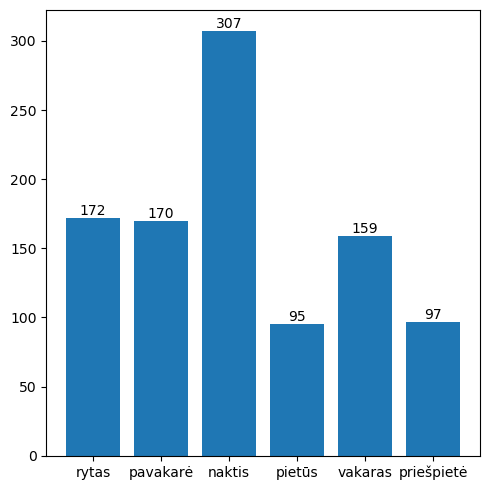

In [13]:
times = np.random.randint(0,24,1000)
# intervalai : 0-6 - naktis, 7-10 - rytas, 
# 11-12 - priešpietė, 13-14-pietūs, 15-18-pavakarė, 19-22 - vakaras, 
# 23 - 0 - naktis. 
#  Parašykite funkciją, kuri iš times sąrašo verčių sugeneruotų 
# tekstų (rytas, vakaras, popietė ... ) sąrašą. Pritaikykite map(). 
# Suskaičiuokite, kiek kartų pasikartojo atitinkami tekstai, atvaizduokite tai su bar arba barh.
def f(x):
    if 0<=x<=6 or x>=23:
        return 'naktis'
    elif 7<=x<=10:
        return 'rytas'
    elif 11<=x<=12:
        return 'priešpietė'
    elif 13<=x<=14:
        return 'pietūs'
    elif 15<=x<=18:
        return 'pavakarė'
    elif 19<=x<=22:
        return 'vakaras'

ptimes = list(map(f, times))
uniq = list(set(ptimes))
vals = dict.fromkeys(uniq, 0)
for i in uniq:
    c = ptimes.count(i)
    vals[i] = c

fig, axis = plt.subplots(figsize=(5,5))
#plotting code:
p = axis.bar(list(vals.keys()), list(vals.values()))
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [12]:
# Su map() sugeneruokite naują sąrašą, kur būtų pirmi 3 simboliai didžiosiomis iš duotojo sąrašo:
a = ['BMW', 'Mitsubishi', 'Seat', 'Skoda', 'Volvo', 'Audi', 'Dacia', 'Skoda', 'BMW', 'Volkswagen', 'BMW', 'Mercedes-Benz', 'Ford', 'BMW', 'BMW', 'Mazda', 'Hyundai', 'Audi', 'Volvo', 'BMW', 'Volkswagen', 'Audi', 'Volkswagen', 'Mercedes-Benz', 'Volkswagen']
a3 =  list(map(lambda s: s[:3].upper(), a))
print(a3)

['BMW', 'MIT', 'SEA', 'SKO', 'VOL', 'AUD', 'DAC', 'SKO', 'BMW', 'VOL', 'BMW', 'MER', 'FOR', 'BMW', 'BMW', 'MAZ', 'HYU', 'AUD', 'VOL', 'BMW', 'VOL', 'AUD', 'VOL', 'MER', 'VOL']


In [ ]:
# :simp  - pagrindinių bibliotekų importavimas
# :imp - daugelio bibliotekų importavimas
# :cnt - prisijungimas prie DB
# :sql - SQL nuskaitymas iš DB
# :fig, :sfig - vieno grafiko kodas
# :fig4h, :sfig4h - 4rių ašių kodas
# :sfigh2, :figh2 - dviejų ašių horizontaliai braižymas
# :warnings - išjungia įspėjimus UserWarning
# :streamlit - streamlit projekto pradžia
# :theme - nustato grafikų temą (stilių)
# :bar - vienas bar'as su x ašyje esančiais label'iais
# :bar2 - du bar'ai su x ašyje esančiais label'iais
# :bar3 - stulpelinio (bar) grafiko braižymas, kai yra 3 skirtingi barai, x ašyje norima turėti labelius
#: pdsql - sql užklausa per pandas sql_query

In [24]:
nypd = pd.read_csv('../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})[['DATA','BORO','STATISTICAL_MURDER_FLAG']]
nypd.head(2)

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2021-03-30 23:45:00,QUEENS,False
1,2021-03-30 16:20:00,BROOKLYN,False


In [31]:
d14 = pd.read_csv('../DATA/DUS2014.csv')[['lytis','issilavinimas','amzius','bdu_spalio']]
d14.head(2)

,lytis,issilavinimas,amzius,bdu_spalio
0,M,G4,20-29,6.0
1,F,G2,20-29,6.0


In [32]:
#  .apply()

def c(x):
    return x/3.4528

d14['€'] = d14['bdu_spalio'].apply(c)

d14.head(5)

,lytis,issilavinimas,amzius,bdu_spalio,€
0,M,G4,20-29,6.00,1.737720
1,F,G2,20-29,6.00,1.737720
2,F,G4,40-49,6.00,1.737720
3,F,G4,30-39,6.00,1.737720
4,M,G2,40-49,11.33,3.281395


In [33]:
d14['€copy'] = d14['bdu_spalio'].apply(lambda x: x/3.4528)
d14.head()

,lytis,issilavinimas,amzius,bdu_spalio,€,€copy
0,M,G4,20-29,6.00,1.737720,1.737720
1,F,G2,20-29,6.00,1.737720,1.737720
2,F,G4,40-49,6.00,1.737720,1.737720
3,F,G4,30-39,6.00,1.737720,1.737720
4,M,G2,40-49,11.33,3.281395,3.281395


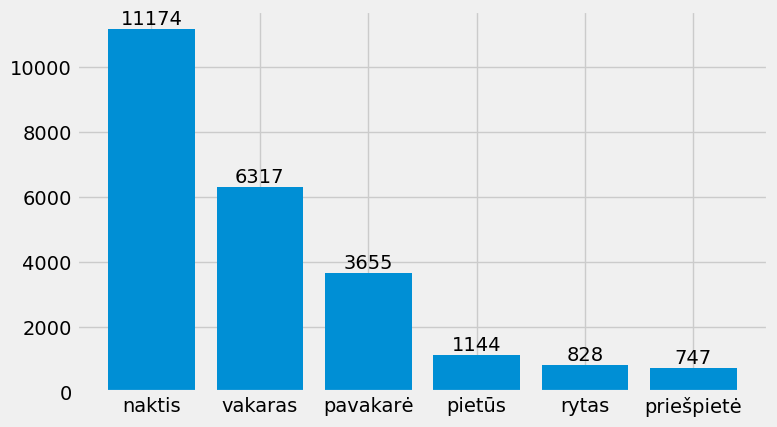

In [39]:
#  prisiminti .dt. modulį pandos:
#  prie nypd pridėkite naują stulpelį V, kur būtų tik įvykio valanda
# tada pritaikykite savo rašytą funkciją su .apply() ir sukurkite naują
# stulpelį su tekstais rytas, vakaras, priešpietė
# tada vizualizuokite, kuriuo paros metu kiek buvo susišaudymų (bar arba barh)

nypd['V'] = nypd['DATA'].dt.hour
nypd['Metas'] = nypd['V'].apply(f)
metas = nypd['Metas'].value_counts()

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(metas.index, metas.values)
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [40]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [42]:
#  :pdsql
#sql užklausa per pandas sql_query
sql="""select gamintojas as G, rida as R, price as K, variklis, pagaminimo_data as D from autopliuslt"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,G,R,K,variklis,D
0,BMW,253 000 km,19 500,"4999 cm³, 507 AG (373kW)",2005-12
1,Mitsubishi,195 405 km,2 700,"2378 cm³, 160 AG (118kW)",2006
2,Seat,129 800 km,13 490,"1598 cm³, 95 AG (70kW)",2019-11
3,Skoda,183 000 km,14 650,"1798 cm³, 179 AG (132kW)",2015-06
4,Volvo,127 896 km,38 000,"1969 cm³, 235 AG (173kW)",2018-08


In [ ]:
#  pridėkite naujus stulpelius - kaina, rida kaip skaičiai (integer) 
#  su apply() metodu, pridėkite naują stulpelį amžius, kaip skaičius